# SYRIATEL CUSTOMER CHURN.<br>
Author: Leonard Rotich<br>
LinkdIn:

## Introduction

Churn is a major problem for most telecom Company, as it can result in lost revenue and reduced profitability. In this project, I aim to develop a machine learning algorithms to build a model to predict and identify customers who are at risk of churning, and provide recommendations to reduce churn rates. In this project, I am going to use SytiaTel Customer Churn dataset which can be found [here](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset).<br>

## Business Understanding:

Customer churn is a big problem in any industry and one of the most important concerns for the Telecom industry. The effect on the revenues of the companies, because of this customer churns is huge, especially in the telecom field, that's why these companies are seeking to develop a predictive potential customer churn. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate, and it costs 5-10 times more to acquire a new customer than to retain an existing one, that's why customer retention has now become even more important than customer acquisition.<br>

Customer churn is a metric showing when a subscriber or a regular customer cancels his subscription or stops doing business with a company. Churn could be due to various factors, including switching to a competitor for better price offers, cancelling their subscription because of poor customer service, or discontinuing all contact with a brand due to insufficient touch points.<br>

Syriatel is a provider of mobile telecommunication and data services based in Damascus, Syria. It has established that long-term relationships with customers are more effective than trying to attract new customers. Churn prediction has therefore become a very important part of the company's strategy.<br>

## Data Understanding:

The dataset has 3333 rows and with 21 columns. Churn column is the target variable which has 483 customers who are churners and the remaining 2850 are non-churners. Since the target variable is a categorical variable, classification algorithms are used to build the predictive model. Recall is used to evaluate the model's performance.<br>

## Objectives:
>>To build a machine learning model that can accurately predict customers who will churn based on the information available in the dataset.<br>

>>To identify the features that are important for predicting customer churn.<br>

>>To advise SyriaTel on how to retain customers.<br>


## Loading Data

Importing Libraries.




In [1]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline

The data used is a csv file `syriatel.csv`. Load the data and preview the first and the last five. 

In [2]:
# importing data using pandas
import pandas as pd 
df = pd.read_csv('syriatel.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [14]:
# Shape of the dataset
print(f'The dataset has:\n {df.shape[0]}, Rows. \n {df.shape[1]} Columns which are as follows:\n {df.columns}')

The dataset has:
 3333, Rows. 
 21 Columns which are as follows:
 Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [12]:
# Getting the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

As we can see, the data set has 3333 rows and 21 columns which has a mixture of float, objects, integer and bool


In [18]:
# df discriptive summary
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


The target variable `churn` has 2850 loyal curstomers and 483 churners. 

### Data cleaning

In this section we will check on:<br> 
**1. Dublicates**


In [21]:
# Function for checking duplicated entries
def identify_duplicates(df):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in df.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates)
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates
        duplicates_percentage = np.round(((no_true / len(df)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.")
identify_duplicates(df)

The Data has no duplicates


The customer's `phone number` is the unique identifier and there should be no duplicate o this column.

In [25]:
# function for checking unique duplicates in unique columns
def unique_column_duplicates(data, column):
    duplicates = [] 
    for d in data[column].duplicated():
        duplicates.append(d)
    # identify if there are any duplicates
    duplicates_set = set(duplicates)
    if (len(duplicates_set) == 1):
        print(f"The column {column.title()} has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
                # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 2)
        print(f"The column {column.title()} has {no_true} duplicated rows.\nWhich trasnlate to {duplicates_percentage}% of the data set.")

unique_column_duplicates(df, 'phone number')   

The column Phone Number has no duplicates


**2. Missing Values**

We need to check on our dataset if there are missing values.


In [26]:
# identify if data has missing values
def identify_missing_values(data):
    # empty dict to store missing values
    missing = []
    for i in data.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values")
    else:
        out = print("The Data has missing values.")

    return out


identify_missing_values(df)

The Data has no missing values


## Exploratory Data Analysis

### **Churn column**

In [20]:
# Checking the value count of the target variable 
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

The **False** values stands for the customers who aren't churners which has a greater percentage **`85%`** as compared to the **True** value which are the churners which is **`15%`**. we can get a clear idea of these using visualization as follows.

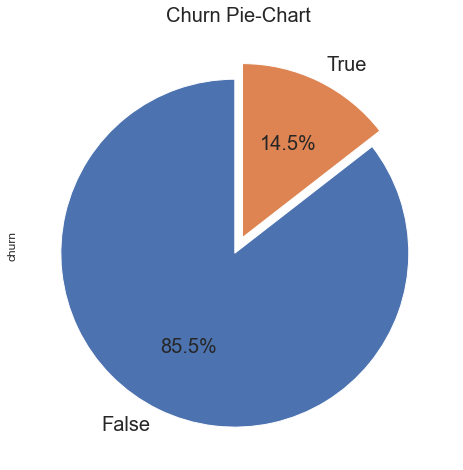

In [83]:
# visualize churn distribution using pie chart 
df.churn.value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  
                                 startangle=90,shadow=False, 
                                 figsize=(8,8), textprops={'fontsize': 20},
                                 style="whitegrid")
plt.title('Churn Pie-Chart',fontsize=20)
plt.show();

### **State column**

It is important to understand the spread of customers of the company so as to have a wide idea of the project. 

In [40]:
# checking on the distribution of the customers 
print(f'SyriaTel customers are spread in {df.state.nunique()} states.')

SyriaTel customers are spread in 51 states


In [82]:
states = dict(df.state.value_counts())
state_name = list(dict(dict(states)).keys())
state_val = list(dict(dict(states)).values())
state_df = pd.DataFrame({'state_name': state_name,
                              'state_val': state_val,
                                })

state_df.head()

,state_name,state_val
0,WV,106
1,MN,84
2,NY,83
3,AL,80
4,WI,78


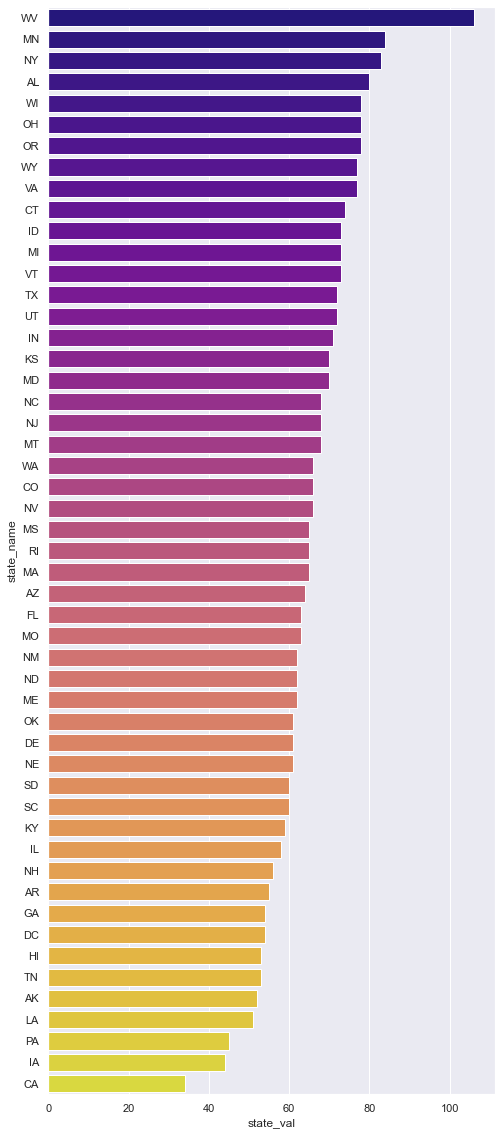

In [80]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,20))
ax = sns.barplot(x=state_df.state_val, y=state_df.state_name, orient='h', palette='plasma')
plt.show()

Majority of the SyriaTel customers are from WV state with a value of 106 customers.

Further on the `state` column, an understanding of the distribution of the churn per state will and value on our analysis.


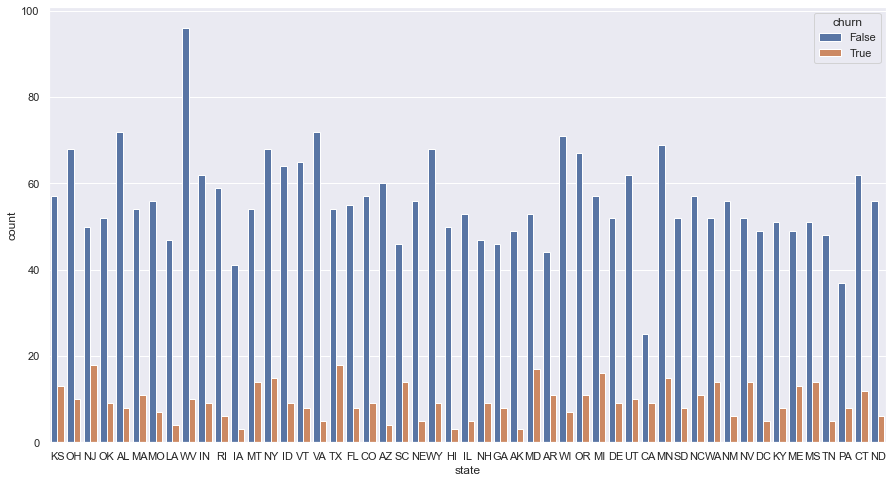

In [87]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x=df.state, hue=df.churn)
plt.show();

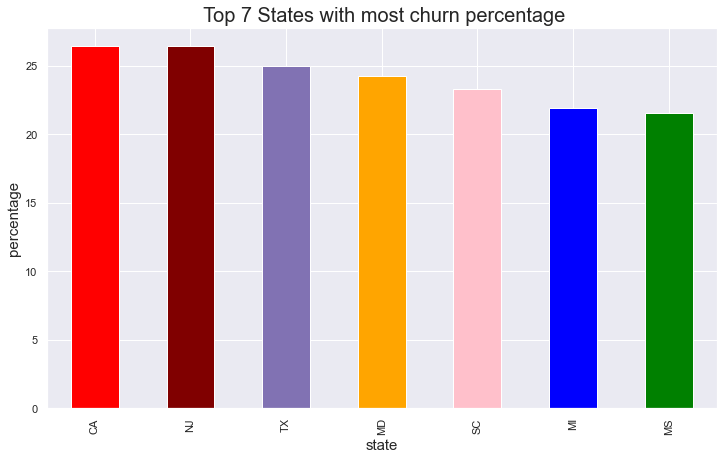

In [106]:
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((df.groupby(['state'])['churn'].mean())*100).sort_values(
    ascending = False).head(7).plot.bar(
        color = ['red','maroon','m','orange','pink','blue','green'])
plt.title(" Top 7 States with most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

Among the 7 top states with churners, CA state has a higher percentage of churners for the company.